In [1]:
#IMPORTING LIBRARIES:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing Dataset:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\Data\Big Mart\Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#Lowering the down column names
df.columns=df.columns.str.lower()
df.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

In [5]:
#Calculating Missing Values
(df.isnull().sum()/len(df))*100

item_identifier               0.000000
item_weight                  17.165317
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                  28.276428
outlet_location_type          0.000000
outlet_type                   0.000000
item_outlet_sales             0.000000
dtype: float64

# Imputation of Missing Value in the columns

In [6]:
group_mean_weight=df.pivot_table(values='item_weight',index='item_type',aggfunc=np.mean)
group_mean_weight

,item_weight
item_type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [7]:
mean_weight=group_mean_weight.iloc[:,[0][0]]
mean_weight

item_type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: item_weight, dtype: float64

In [8]:
# Function to impute Missing Value in item_weight column:
def missing_value(cols):
    item_type=cols[0]
    item_weight=cols[1]
    if pd.isnull(item_weight):
        if item_type == 'Baking Goods':
            return 12.277
        elif item_type == 'Breads':
            return 11.346
        elif item_type == 'Breakfast':
            return 12.768
        elif item_type == 'Canned':
            return 12.305
        elif item_type == 'Diary':
            return 13.426
        elif item_type == 'Frozen Foods':
            return 12.867
        elif item_type == 'Fruits and Vegetables':
            return 13.224
        elif item_type == 'Hard Drinks':
            return 11.400
        elif item_type == 'Health and Hygiene':
            return 13.142
        elif item_type == 'Household':
            return 13.384
        elif item_type == 'Meat':
            return 12.817
        elif item_type == 'Others':
            return 13.853
        elif item_type == 'Seafood':
            return 12.552
        elif item_type == 'Snack Foods':
            return 12.987
        elif item_type == 'Soft Drinks':
            return 11.847
        elif item_type == 'Starchy Foods':
            return 13.690
    return item_weight

In [9]:
#Imputing the missing value by using defined function
df['item_weight']=df[['item_type','item_weight']].apply(missing_value,axis=1)

In [10]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Understandinng Through Visulization

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

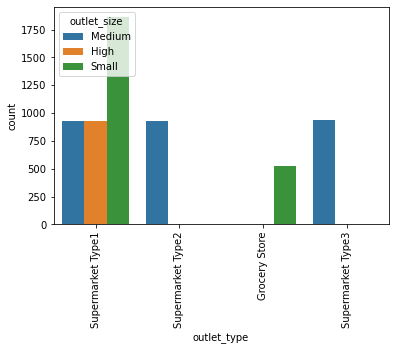

In [11]:
#FINDING FREQUENCY COUNT OF OUTLET TYPE
sns.countplot(data=df,x='outlet_type',hue='outlet_size')
plt.xticks(rotation=90)

In [12]:
# Function for Imputing Missing value in Outlet_Size column:
def impute_size(cols):
    size = cols[0]
    ot_type = cols[1]
    if pd.isnull(size):
        if ot_type == "Supermarket Type1":
            return "Small"
        elif ot_type == "Supermarket Type2":
            return "Medium"
        elif ot_type == "Grocery Store":
            return "Small"
        elif ot_type == "Supermarket Type3":
            return "Medium"
    return size   

In [13]:
#USING ABOVE DEFINED FUNCTION IMPUTE MISSING VALUES IN OUTLET SIZE COLUMNS
df['outlet_size']=df[['outlet_size','outlet_type']].apply(impute_size,axis=1)

In [14]:
# While exploring item_fat_content we found different unique value
df['item_fat_content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
df['item_fat_content']=df['item_fat_content'].str.replace('LF','low fat').str.replace('reg','regular').str.lower()

In [16]:
df['item_fat_content'].unique()

array(['low fat', 'regular'], dtype=object)

While exploring the "item_visibility" column, We Found many items visibility as 0.0 which is impossible. Hence, imputing these 0.0 values with MEAN of respective item of visibility.

In [17]:
mean_visibility=df.pivot_table(index='item_identifier', values='item_visibility')

In [18]:
df.loc[(df["item_visibility"] == 0.0), "item_visibility"] = df.loc[(df["item_visibility"] == 0.0), "item_identifier"].apply(lambda x : mean_visibility.at[x, "item_visibility"])                                                                  

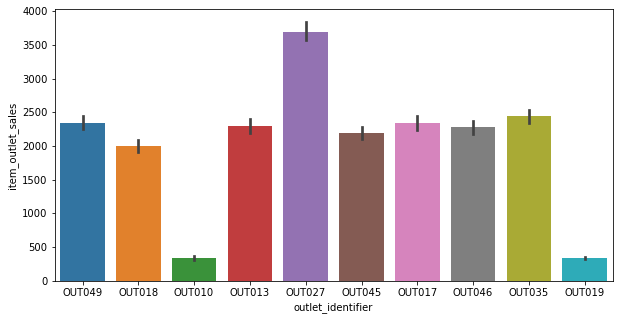

In [19]:
#understanding outlet_identifier depending on item_outlet_sales
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='outlet_identifier',y='item_outlet_sales')

Text(0, 0.5, 'Mean of Item outlet sales')

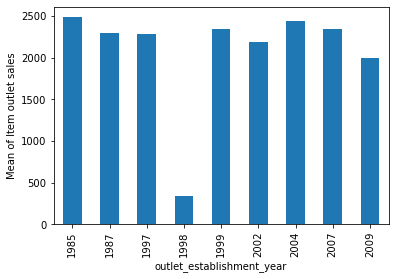

In [20]:
#Understanding to ultet_establishment per year with respective to mean of each respective year item outlet sales
df.groupby('outlet_establishment_year')['item_outlet_sales'].mean().plot.bar()
plt.ylabel('Mean of Item outlet sales')

Text(0, 0.5, 'Mean of Item outlet sales')

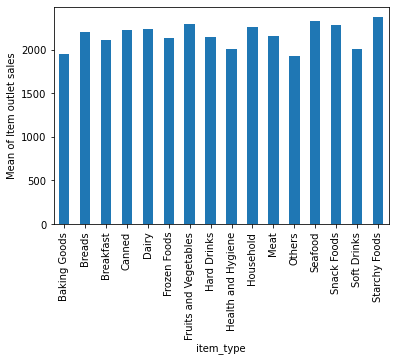

In [21]:
#Understanding to item_type per year with respective to mean of each respective year item outlet sales
df.groupby('item_type')['item_outlet_sales'].mean().plot.bar()
plt.ylabel('Mean of Item outlet sales')

Text(0, 0.5, 'Mean of Item outlet sales')

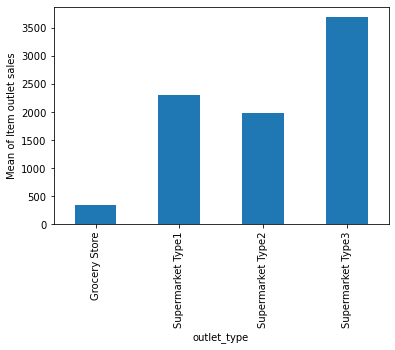

In [22]:
#Understanding to outlet_type per year with respective to mean of each respective year item outlet sales
df.groupby('outlet_type')['item_outlet_sales'].mean().plot.bar()
plt.ylabel('Mean of Item outlet sales')

In [23]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Replacing The Categorical Values Containing Columns With Their Respective Frequency or Count

In [24]:
df.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

In [25]:
#MAPPING EACH CATEGORICAL COLUMN WITH RESPECTIVE FREQUENCY OF THE VALUES IN THE COLUMNS
cols=['item_identifier','item_fat_content','item_type','outlet_identifier','outlet_establishment_year','outlet_size', 
      'outlet_location_type','outlet_type',]
for i in cols:
    x=df[i].value_counts().to_dict()
    df[i]=df[i].map(x)

In [26]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,8,9.30,5517,0.016047,682,249.8092,930,930,2793,2388,5577,3735.1380
1,6,5.92,3006,0.019278,445,48.2692,928,928,2793,3350,928,443.4228
2,7,17.50,5517,0.016760,425,141.6180,930,930,2793,2388,5577,2097.2700
3,6,19.20,3006,0.015274,1232,182.0950,555,555,4798,3350,1083,732.3800
4,6,8.93,5517,0.008082,910,53.8614,932,932,932,3350,5577,994.7052


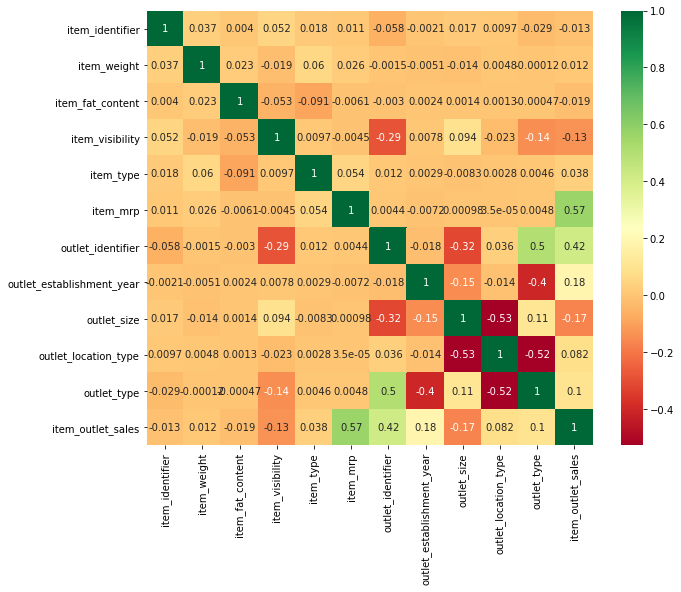

In [27]:
#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

In [28]:
#REMOVING LESS CORRELATED COLUMNS 
df_new =df.drop(["item_weight","item_identifier", "item_type", "item_fat_content","outlet_location_type"], axis = 1)

In [29]:
df_new.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
0,0.016047,249.8092,930,930,2793,5577,3735.1380
1,0.019278,48.2692,928,928,2793,928,443.4228
2,0.016760,141.6180,930,930,2793,5577,2097.2700
3,0.015274,182.0950,555,555,4798,1083,732.3800
4,0.008082,53.8614,932,932,932,5577,994.7052


In [30]:
df_new.skew()

item_visibility              1.233294
item_mrp                     0.127202
outlet_identifier           -2.244651
outlet_establishment_year    0.936439
outlet_size                 -0.803018
outlet_type                 -0.650418
item_outlet_sales            1.177531
dtype: float64

# VISUALIZING SKWENESS OF THE DATASET

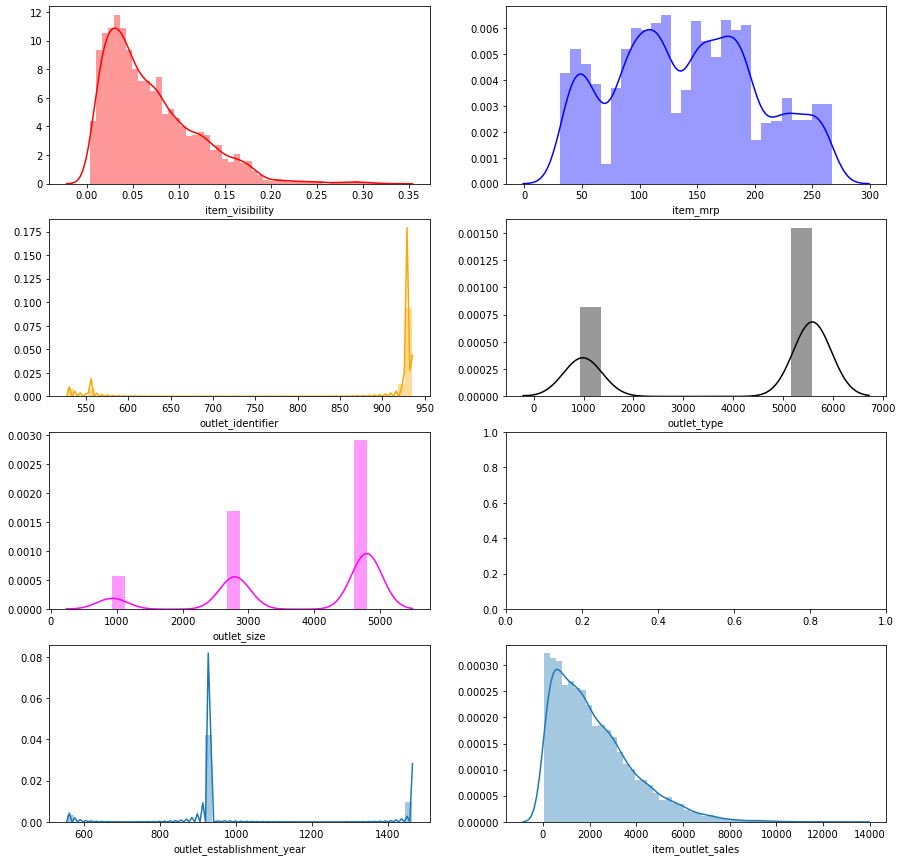

In [31]:
# Before Transformation
fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.distplot(df_new["item_visibility"], kde =True, ax=ax[0,0], color = "red")

sns.distplot(df_new["item_mrp"], kde =True, ax=ax[0,1], color = "blue")

sns.distplot(df_new["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")

sns.distplot(df_new["outlet_type"], kde =True, ax=ax[1,1], color = "black")

sns.distplot(df_new["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")

sns.distplot(df_new["outlet_establishment_year"], kde =True, ax=ax[3,0])

sns.distplot(df_new["item_outlet_sales"], kde =True, ax=ax[3,1])

From the above plot it is clear that many columns are not following the normal distribution and not properly scaled. Therefore, we will apply "Logarithmic" Transformation on above dataset to make it scale and reduce the skewness.

In [32]:
df_new.columns

Index(['item_visibility', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_type',
       'item_outlet_sales'],
      dtype='object')

In [33]:
for i in df_new.columns:
    df_new[i]=np.log(df_new[i])

In [34]:
df_new.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
0,-4.132215,5.520697,6.835185,6.835185,7.934872,8.626406,8.225540
1,-3.948780,3.876794,6.833032,6.833032,7.934872,6.833032,6.094524
2,-4.088756,4.953133,6.835185,6.835185,7.934872,8.626406,7.648392
3,-4.181625,5.204529,6.318968,6.318968,8.475954,6.987490,6.596300
4,-4.818097,3.986414,6.837333,6.837333,6.837333,8.626406,6.902446


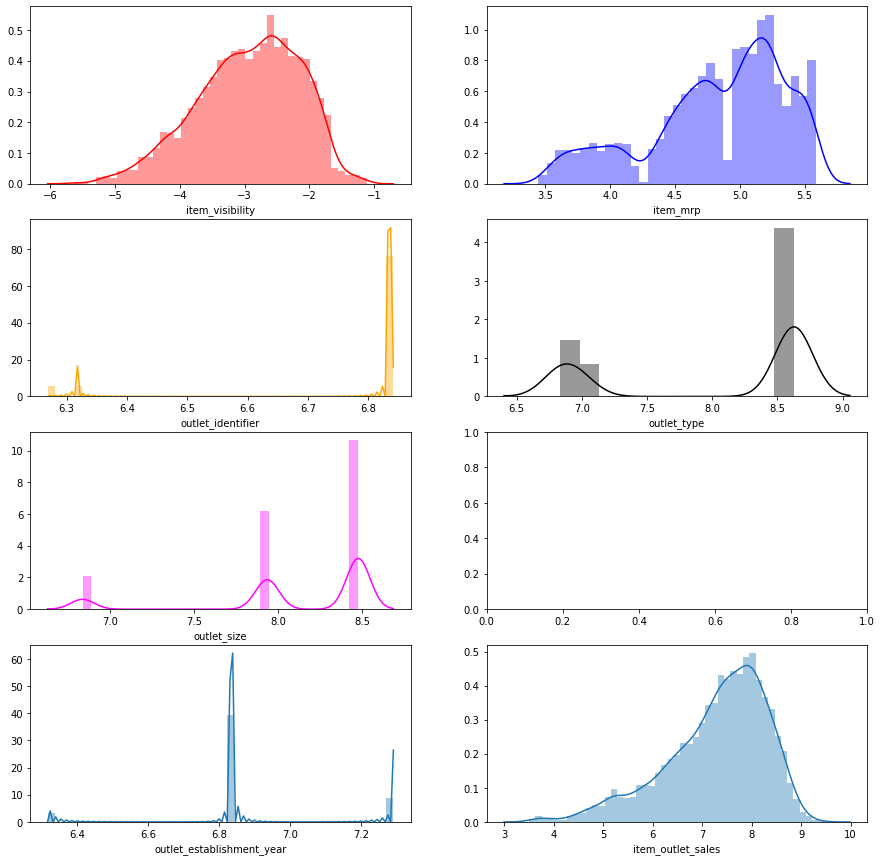

In [35]:
# After Transformation
fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.distplot(df_new["item_visibility"], kde =True, ax=ax[0,0], color = "red")

sns.distplot(df_new["item_mrp"], kde =True, ax=ax[0,1], color = "blue")

sns.distplot(df_new["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")

sns.distplot(df_new["outlet_type"], kde =True, ax=ax[1,1], color = "black")

sns.distplot(df_new["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")

sns.distplot(df_new["outlet_establishment_year"], kde =True, ax=ax[3,0])

sns.distplot(df_new["item_outlet_sales"], kde =True, ax=ax[3,1])

In [36]:
df_new.skew()

item_visibility             -0.429840
item_mrp                    -0.735795
outlet_identifier           -2.249965
outlet_establishment_year    0.026025
outlet_size                 -1.539875
outlet_type                 -0.657515
item_outlet_sales           -0.887753
dtype: float64

# Fitting Linear Regression Model

In [37]:
X=df_new.drop('item_outlet_sales',axis=1)
y=df_new['item_outlet_sales'].values.reshape(-1,1)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
prediction=lr.predict(X_test)

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
print(r2_score(y_test,prediction))
print(sqrt(mean_squared_error(y_test,prediction)))

0.757028146007712
0.519778744716386


In [42]:
#Residue of the Linear Regression Model 
residue_lr = y_test -prediction

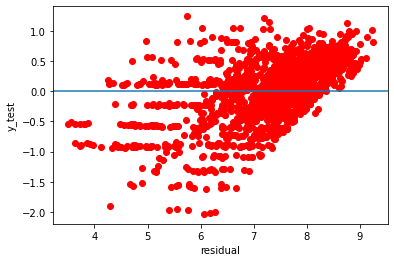

In [43]:
#Plotting Residual Plot
plt.scatter(y_test,residue_lr, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

# 1. R2 Score=0.757028146007712

# 2. RMSE=0.519778744716386

# Lasso Regression

In [44]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.009)
ls.fit(X_train,y_train)

Lasso(alpha=0.009)

In [45]:
predictions=ls.predict(X_test)

In [46]:
print(r2_score(y_test,predictions))
print(sqrt(mean_squared_error(y_test,predictions)))

0.7468491769184082
0.530554746291775


In [47]:
#Getting Lasso Coefficent
lasso_coeff = pd.Series(ls.coef_, index =X.columns) 

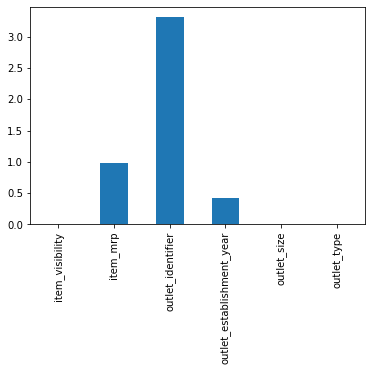

In [48]:
#Visualization of Coefficent after LASSO 
lasso_coeff.plot(kind = "bar")

In [49]:
#RESHAPING THE PREDICTED VALUES
ls_pred= predictions.reshape(-1,1)

ls_pred

array([[7.86649549],
       [7.45465459],
       [6.52762899],
       ...,
       [7.92350261],
       [7.03867668],
       [6.64322991]])

In [50]:
#RESIDUE VALUE AFTER LASSO REGRESSION
residue = y_test - ls_pred

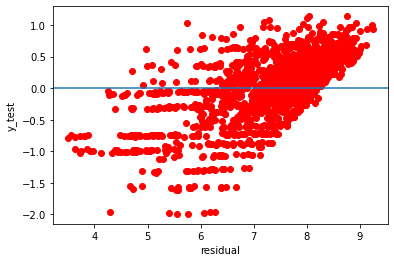

In [51]:
plt.scatter(y_test.reshape(-1,1),residue, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

# 1. R2 Score=0.7468491769184082
# 2. RMSE=0.530554746291775

# RIDGE Regression

In [52]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=0.009)
rd.fit(X_train,y_train)

Ridge(alpha=0.009)

In [53]:
predictionss=rd.predict(X_test)

In [54]:
print(r2_score(y_test,predictionss))
print(sqrt(mean_squared_error(y_test,predictionss)))

0.7570259649297462
0.5197810776520828


In [55]:
#RESIDUE VALUE AFTER RIDGE REGRESSION
residue = y_test - predictionss

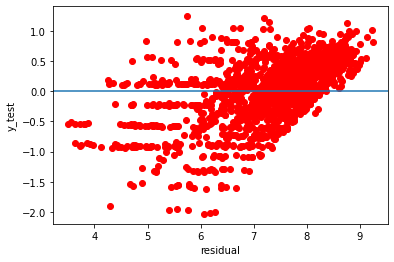

In [56]:
#plotting of residual graph after RIDGE REGRESSION
plt.scatter(y_test,residue, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

# 1. R2 Score= 0.7570259649297462
# 2. RMSE=0.5197810776520828

Selcting The Better Model
1. From above three different model after applying LASSO AND RIDGE Regression, we can accept the model which is giving the better "RMSE SCORE" and higher accuracy (R2_SCORE).
2. Lasso Regression is showing the low accuracy in terms of Linear regression.
3. Ridge Regression is showing the similar accuracy in terms of Linear Regression.
HENCE, ACCEPTING THE LINEAR REGRESSION MODEL TO PREDICT THE TEST DATA ITEM OUTLET SALE.

# TEST DATA

In [57]:
df2=pd.read_csv(r"C:\Users\Lenovo\Desktop\Data\Big Mart\Test.csv")
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [59]:
df2.columns=df2.columns.str.lower()
df2.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type'],
      dtype='object')

In [60]:
# calculating null value
(df2.isnull().sum()/len(df2))*100

item_identifier               0.000000
item_weight                  17.180074
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                  28.269671
outlet_location_type          0.000000
outlet_type                   0.000000
dtype: float64

# IMPUTATION OF MISSING VALUES

In [61]:
#calculating the mean of item_weight with respective to item_type
group_mean_weight=df2.pivot_table(index=['item_type'],values='item_weight',aggfunc=[np.mean])
group_mean_weight

,mean
,item_weight
item_type,
Baking Goods,12.272418
Breads,10.866799
Breakfast,13.759603
Canned,12.393565
Dairy,12.955040
Frozen Foods,12.101543
Fruits and Vegetables,13.146659
Hard Drinks,11.844417


In [62]:
mean_weight=group_mean_weight.iloc[:,[0][0]]
mean_weight

item_type
Baking Goods             12.272418
Breads                   10.866799
Breakfast                13.759603
Canned                   12.393565
Dairy                    12.955040
Frozen Foods             12.101543
Fruits and Vegetables    13.146659
Hard Drinks              11.844417
Health and Hygiene       13.216929
Household                13.270504
Meat                     12.702148
Others                   14.009725
Seafood                  13.241136
Snack Foods              12.684256
Soft Drinks              11.691965
Starchy Foods            13.618247
Name: (mean, item_weight), dtype: float64

In [63]:
# Function to impute Missing Value in item_weight column:
def missing_value1(cols):
    item_type=cols[0]
    item_weight=cols[1]
    if pd.isnull(item_weight):
        if item_type == 'Baking Goods':
            return 12.272
        elif item_type == 'Breads':
            return 10.866
        elif item_type == 'Breakfast':
            return 13.1759
        elif item_type == 'Canned':
            return 12.393
        elif item_type == 'Dairy':
            return 12.955
        elif item_type == 'Frozen Foods':
            return 12.101
        elif item_type == 'Fruits and Vegetables':
            return 13.146
        elif item_type == 'Hard Drinks':
            return 11.844
        elif item_type == 'Health and Hygiene':
            return 13.216
        elif item_type == 'Household':
            return 13.270
        elif item_type == 'Meat':
            return 12.702
        elif item_type == 'Others':
            return 14.009
        elif item_type == 'Seafood':
            return 13.241
        elif item_type == 'Snack Foods':
            return 12.684
        elif item_type == 'Soft Drinks':
            return 11.691
        elif item_type == 'Starchy Foods':
            return 13.618
    return item_weight       

In [64]:
#applying the above function to the dataset
df2['item_weight']=df2[['item_type','item_weight']].apply(missing_value1,axis=1)

In [65]:
df2.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.955,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

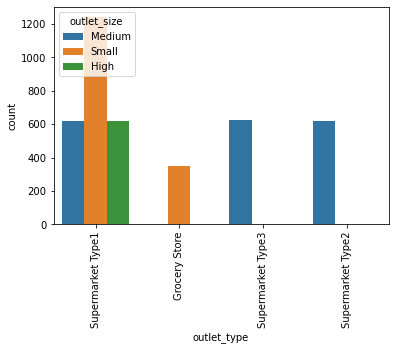

In [66]:
#Frequency count of the outlet_type 
sns.countplot(data=df2,x='outlet_type',hue='outlet_size')
plt.xticks(rotation=90)

In [67]:
# Function for Imputing Missing value in Outlet_Size column:
def impute_size1(cols):
    size=cols[0]
    ot_type=cols[1]
    if pd.isnull(size):
        if ot_type =='Supermarket Type1':
            return 'Small'
        elif ot_type =='Grocery Store':
            return 'Small'
        elif ot_type =='Supermarket Type2':
            return 'Medium'
        elif ot_type =='Supermarket Type3':
            return 'Medium'
    return size

In [68]:
df2['outlet_size']=df2[['outlet_size','outlet_type']].apply(impute_size1,axis=1)

In [69]:
df2.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.955,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [70]:
df2['item_fat_content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [71]:
df2['item_fat_content']=df2['item_fat_content'].str.replace('LF','low fat').str.replace('reg','regular').str.lower()

In [72]:
df2['item_fat_content'].unique()

array(['low fat', 'regular'], dtype=object)

In [73]:
mean_visibility=df2.pivot_table(index='item_identifier',values='item_visibility')
mean_visibility.head()

,item_visibility
item_identifier,
DRA12,0.040901
DRA24,0.040009
DRA59,0.128046
DRB01,0.078302
DRB13,0.005294


In [74]:
df2.loc[(df2['item_visibility']== 0.0),'item_visibility'] = df2.loc[(df2["item_visibility"] == 0.0), "item_identifier"].apply(lambda x : mean_visibility.at[x, "item_visibility"])                                                               

In [75]:
df2.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,low fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600,low fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315,low fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.955,regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [76]:
df2.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type'],
      dtype='object')

# IMPUTING CATEGORICAL VALUES WITH FREQUENCY OF RESPECTIVE COLUMNS IN THE TEST DATA

In [77]:
cols=['item_identifier','item_fat_content','item_type','outlet_identifier','outlet_size', 
      'outlet_establishment_year', 'outlet_location_type',  'outlet_type']
for i in cols:
    x=df2[i].value_counts().to_dict()
    df2[i]=df2[i].map(x)

In [78]:
df2.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,7,20.750,3668,0.007565,789,107.8622,620,620,1862,1592,3717
1,6,8.300,2013,0.038428,454,87.3198,617,617,3198,1856,3717
2,4,14.600,3668,0.099575,111,241.7538,370,370,3198,2233,722
3,3,7.315,3668,0.015388,789,155.0340,617,617,3198,1856,3717
4,4,12.955,2013,0.118599,454,234.2300,624,976,1862,2233,624


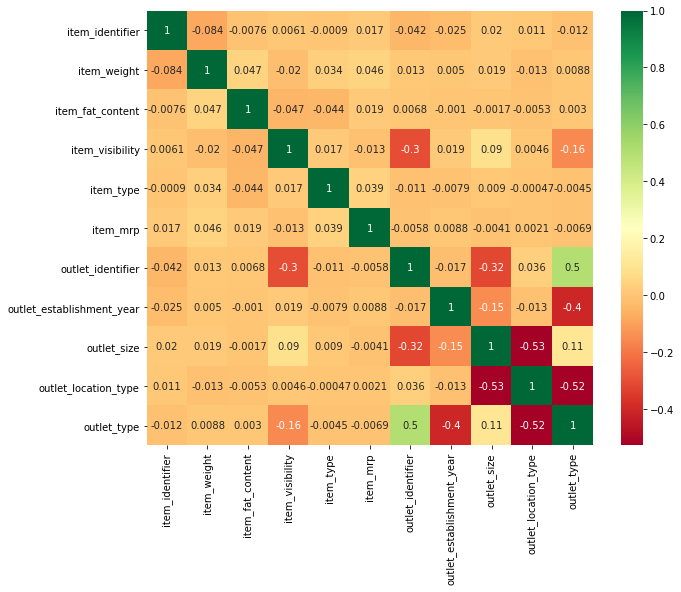

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),cmap='RdYlGn',annot=True)

In [80]:
df2_new=df2.drop(["item_weight","item_identifier", "item_type", "item_fat_content","outlet_location_type"],axis=1)

In [81]:
df2_new.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type
0,0.007565,107.8622,620,620,1862,3717
1,0.038428,87.3198,617,617,3198,3717
2,0.099575,241.7538,370,370,3198,722
3,0.015388,155.0340,617,617,3198,3717
4,0.118599,234.2300,624,976,1862,624


In [82]:
#Skewness Before Transformation:
df2_new.skew()

item_visibility              1.318798
item_mrp                     0.136182
outlet_identifier           -2.243972
outlet_establishment_year    0.940664
outlet_size                 -0.803617
outlet_type                 -0.650194
dtype: float64

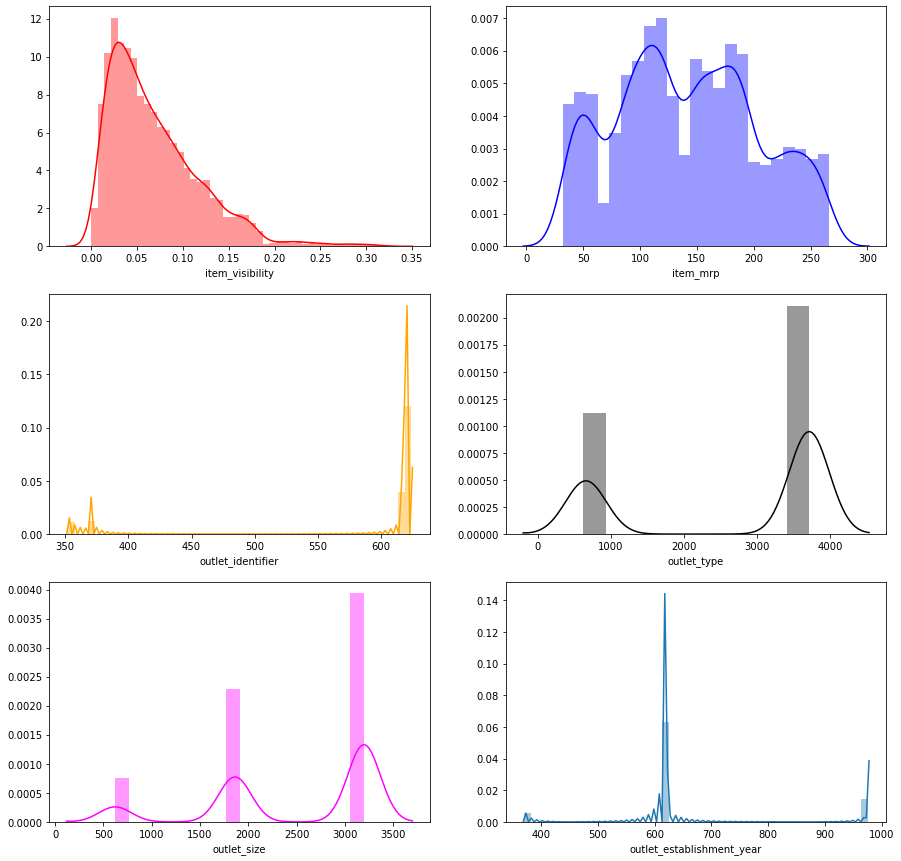

In [83]:
#VISUALIZING THE SKEWNESS OF THE DATASET
# Before Transformation
fig, ax = plt.subplots(3,2,figsize = (15,15))

sns.distplot(df2_new["item_visibility"], kde =True, ax=ax[0,0], color = "red")

sns.distplot(df2_new["item_mrp"], kde =True, ax=ax[0,1], color = "blue")

sns.distplot(df2_new["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")

sns.distplot(df2_new["outlet_type"], kde =True, ax=ax[1,1], color = "black")

sns.distplot(df2_new["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")

sns.distplot(df2_new["outlet_establishment_year"], kde =True, ax=ax[2,1])

In [84]:
#Applying the log transformation
for i in df2_new.columns:
    df2_new[i]=np.log(df2[i]+1)

In [85]:
#Skewness After Transformation:
df2_new.skew()

item_visibility              1.159161
item_mrp                    -0.714215
outlet_identifier           -2.249508
outlet_establishment_year    0.035052
outlet_size                 -1.540480
outlet_type                 -0.657290
dtype: float64

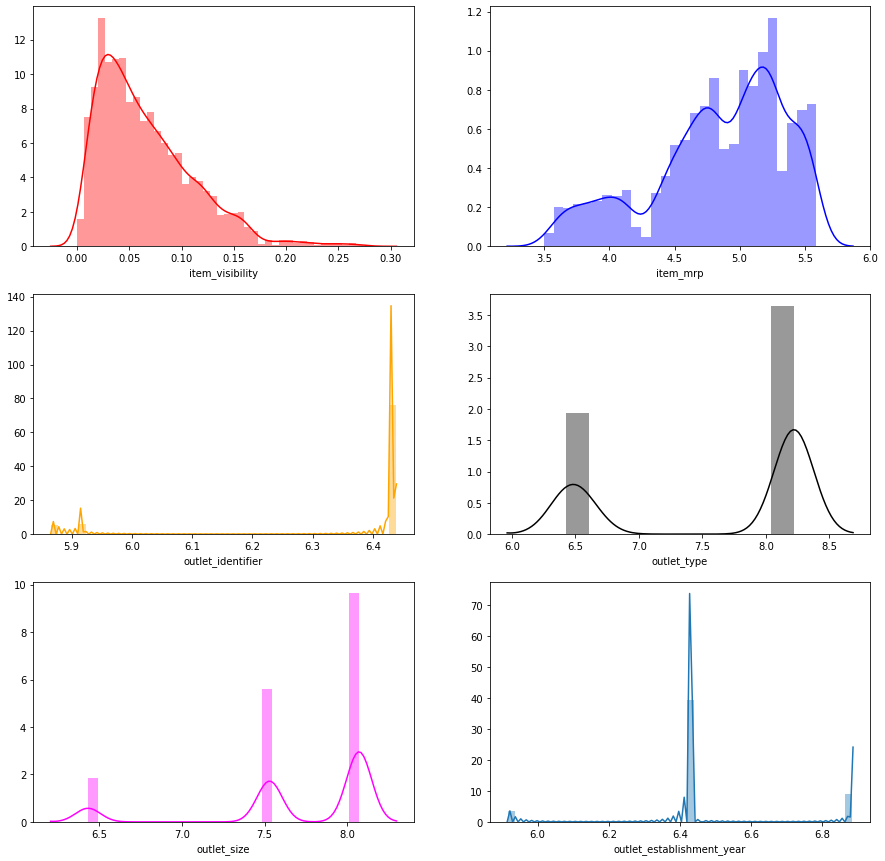

In [86]:
#After Transformation 
fig, ax = plt.subplots(3,2,figsize = (15,15))
sns.distplot(df2_new["item_visibility"], kde =True, ax=ax[0,0], color = "red")

sns.distplot(df2_new["item_mrp"], kde =True, ax=ax[0,1], color = "blue")

sns.distplot(df2_new["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")

sns.distplot(df2_new["outlet_type"], kde =True, ax=ax[1,1], color = "black")

sns.distplot(df2_new["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")

sns.distplot(df2_new["outlet_establishment_year"], kde =True, ax=ax[2,1])

# Apply Model to the Test Data for Predicting The item Outsale Values:

In [87]:
item_outlet_sale=lr.predict(df2_new)
item_outlet_sale

array([[5.67640946],
       [5.46067678],
       [4.38498969],
       ...,
       [5.78283971],
       [6.36533156],
       [5.38430632]])

# Above predicted values are transformed values. Therefore, we need to inverse transform it to get actual predicted values.

In [88]:
#Performing inverse transformation
actual_item_outsale=np.exp(item_outlet_sale+1)
actual_item_outsale

array([[ 793.46502665],
       [ 639.49370755],
       [ 218.10785445],
       ...,
       [ 882.57141188],
       [1580.2392849 ],
       [ 592.47360083]])

In [89]:
#ADDING THE PREDICTED ITEM_OUTLET_SALE COLUMNS TO TEST DATA
df2['item_outlet_sale']=actual_item_outsale
df2.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sale
0,7,20.750,3668,0.007565,789,107.8622,620,620,1862,1592,3717,793.465027
1,6,8.300,2013,0.038428,454,87.3198,617,617,3198,1856,3717,639.493708
2,4,14.600,3668,0.099575,111,241.7538,370,370,3198,2233,722,218.107854
3,3,7.315,3668,0.015388,789,155.0340,617,617,3198,1856,3717,1138.258763
4,4,12.955,2013,0.118599,454,234.2300,624,976,1862,2233,624,2383.376614
